In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer':'https://www.amazon.in/s?k=fireboltt+phoenix+ultra+smartwatch&crid=3NF325QMGHUNO&sprefix=fireboltt+pho%2Caps%2C211&ref=nb_sb_ss_ts-doa-p_3_13',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
#It creates a parse tree from page source code that can be used to extract data easily.
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

#this function attempts to parse the HTML structure of the product page, identify review sections, and extract specific information like title, rating, review text, and date for each review. 
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
#this code attempts to scrape reviews for a product on Amazon across multiple pages (up to 160 pages)

for x in tqdm_notebook(range(250)):
    soup = get_soup(f'https://www.amazon.in/Fire-Boltt-Stainless-Bluetooth-Smartwatch-Monitoring/product-reviews/B0BY2PWDFQ/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=avp_only_reviews&pageNumber=1&filterByStar=all_stars&sortBy=helpful')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/250 [00:00<?, ?it/s]

### Converting the data into Dataframe

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nLooks Good and Worth It Wa...,4.0,This watch delivers on both style and value. I...,Reviewed in India on 6 March 2024
1,4.0 out of 5 stars\nAwsome product with reason...,4.0,Its a nice watch with various features and tha...,Reviewed in India on 7 March 2024
2,4.0 out of 5 stars\nLuxury!,4.0,"It's astonishing , looks perfectly amazing and...",Reviewed in India on 6 March 2024
3,4.0 out of 5 stars\nCompletely Satisfied,4.0,The quality is good with so many features..Th...,Reviewed in India on 7 March 2024
4,4.0 out of 5 stars\nGood product,4.0,Good product in this price range..Probably gue...,Reviewed in India on 6 March 2024
...,...,...,...,...
1455,4.0 out of 5 stars\nAwesome Product to buy,4.0,Its a nice watch with various features and tha...,Reviewed in India on 3 March 2024
1456,4.0 out of 5 stars\nNice product,4.0,Very nice looking watch. My daughter is happy ...,Reviewed in India on 1 March 2024
1457,"4.0 out of 5 stars\n""Unfulfilled Promises: A C...",4.0,The Firebolt Phoenix bsw196 has garnered atten...,Reviewed in India on 3 March 2024
1458,4.0 out of 5 stars\nA Good product for this pr...,4.0,It's a very good product for this price range ...,Reviewed in India on 27 February 2024


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nLooks Good and Worth It Wa...,4.0,This watch delivers on both style and value. I...,6 March 2024
1,4.0 out of 5 stars\nAwsome product with reason...,4.0,Its a nice watch with various features and tha...,7 March 2024
2,4.0 out of 5 stars\nLuxury!,4.0,"It's astonishing , looks perfectly amazing and...",6 March 2024
3,4.0 out of 5 stars\nCompletely Satisfied,4.0,The quality is good with so many features..Th...,7 March 2024
4,4.0 out of 5 stars\nGood product,4.0,Good product in this price range..Probably gue...,6 March 2024
5,4.0 out of 5 stars\nAwesome Product to buy,4.0,Its a nice watch with various features and tha...,3 March 2024
6,4.0 out of 5 stars\nNice product,4.0,Very nice looking watch. My daughter is happy ...,1 March 2024
7,"4.0 out of 5 stars\n""Unfulfilled Promises: A C...",4.0,The Firebolt Phoenix bsw196 has garnered atten...,3 March 2024
8,4.0 out of 5 stars\nA Good product for this pr...,4.0,It's a very good product for this price range ...,27 February 2024
9,4.0 out of 5 stars\nThe best smartwatches are ...,4.0,The best smartwatches are excellent fitness ga...,3 March 2024


### Converting into CSV file

In [9]:
df.to_csv("FireBoltwatch_Review.csv")

In [10]:
reviews = pd.read_csv('FireBoltwatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nLooks Good and Worth It Wa...,4.0,This watch delivers on both style and value. I...,6 March 2024
1,4.0 out of 5 stars\nAwsome product with reason...,4.0,Its a nice watch with various features and tha...,7 March 2024
2,4.0 out of 5 stars\nLuxury!,4.0,"It's astonishing , looks perfectly amazing and...",6 March 2024
3,4.0 out of 5 stars\nCompletely Satisfied,4.0,The quality is good with so many features..Th...,7 March 2024
4,4.0 out of 5 stars\nGood product,4.0,Good product in this price range..Probably gue...,6 March 2024
...,...,...,...,...
1455,4.0 out of 5 stars\nAwesome Product to buy,4.0,Its a nice watch with various features and tha...,3 March 2024
1456,4.0 out of 5 stars\nNice product,4.0,Very nice looking watch. My daughter is happy ...,1 March 2024
1457,"4.0 out of 5 stars\n""Unfulfilled Promises: A C...",4.0,The Firebolt Phoenix bsw196 has garnered atten...,3 March 2024
1458,4.0 out of 5 stars\nA Good product for this pr...,4.0,It's a very good product for this price range ...,27 February 2024


In [11]:
reviews.Rating.describe()

count    1460.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: Rating, dtype: float64

In [12]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [13]:
#removing null values from review column
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nLooks Good and Worth It Wa...,4.0,This watch delivers on both style and value. I...,6 March 2024
1,4.0 out of 5 stars\nAwsome product with reason...,4.0,Its a nice watch with various features and tha...,7 March 2024
2,4.0 out of 5 stars\nLuxury!,4.0,"It's astonishing , looks perfectly amazing and...",6 March 2024
3,4.0 out of 5 stars\nCompletely Satisfied,4.0,The quality is good with so many features..Th...,7 March 2024
4,4.0 out of 5 stars\nGood product,4.0,Good product in this price range..Probably gue...,6 March 2024


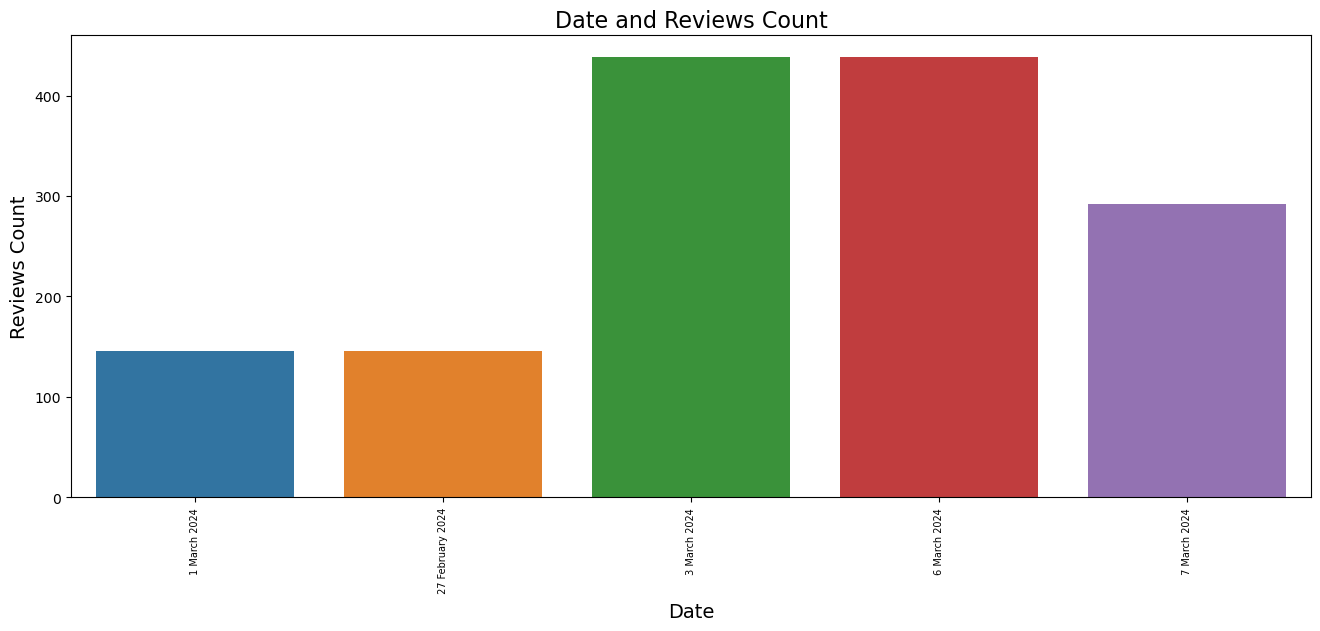

In [14]:
#Analysing on which date we got the reviews
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date and Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

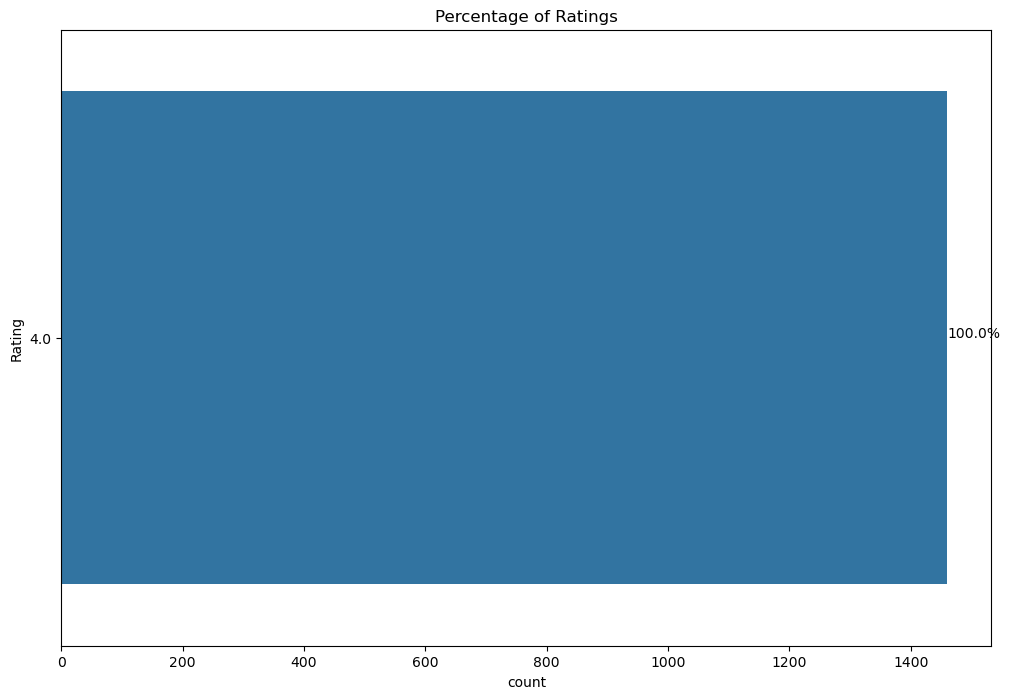

In [15]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [16]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    His watch delivers on both style and value. It...
1    Its a nice watch with various features and tha...
2    It's astonishing , looks perfectly amazing and...
3    The quality is good with so many  features..Th...
4    Good product in this price range..Probably gue...
Name: Review, dtype: object

In [17]:
#Keeping the reviews in sepearte dataframe.
watch_review = reviews[['Review']]
watch_review

,Review
0,This watch delivers on both style and value. I...
1,Its a nice watch with various features and tha...
2,"It's astonishing , looks perfectly amazing and..."
3,The quality is good with so many features..Th...
4,Good product in this price range..Probably gue...
...,...
1455,Its a nice watch with various features and tha...
1456,Very nice looking watch. My daughter is happy ...
1457,The Firebolt Phoenix bsw196 has garnered atten...
1458,It's a very good product for this price range ...


In [18]:
watch_review.reset_index(drop=True, inplace=True)

In [19]:
stop_words = stopwords.words('english')
watch_review['Review'] = watch_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

### Creating a lemmatizer

In [20]:
#t removes punctuation, converts text to lowercase, and removes stop words to focus on more meaningful content in the reviews.

lemmatizer = WordNetLemmatizer()
corpus=[]
for i in tqdm_notebook(range(0, len(watch_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", watch_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/1460 [00:00<?, ?it/s]

In [21]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": watch_review.Review})
dataframe

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
...,...,...
1455,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
1456,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
1457,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
1458,good product price range purchased yesterday e...,it's good product price range i purchased yest...


In [22]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    compiled_regex = re.compile(pattern_regex)  # Compile the regex for efficiency
    return compiled_regex.sub('', text)  # Replace all occurrences in one passreturn text 

In [23]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...


In [24]:
#creates a new list to store reviews without links. 
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...


In [25]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...


In [26]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...


In [27]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emotions
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [28]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...


In [29]:
#Removing stop words
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [30]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [31]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...
4,good product price range probably guessing met...,"good product price range..probably guessing, m..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...


In [32]:
TextBlob(dataframe['Clean_Reviews'][56]).words  #return a list of words present in the text/review

WordList(['nice', 'looking', 'watch', 'daughter', 'happy', 'look', 'style', 'good', 'price', 'time', 'seems', 'reset', 'often', 'still', 'checking'])

In [33]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [watch, delivers, style, value, sleek, design,...
1    [nice, watch, various, feature, reasonable, pr...
2    [astonishing, look, perfectly, amazing, luxuri...
3    [quality, good, many, feature, stainless, stee...
4    [good, product, price, range, probably, guessi...
5    [nice, watch, various, feature, reasonable, pr...
6    [nice, looking, watch, daughter, happy, look, ...
7    [firebolt, phoenix, bsw, garnered, attention, ...
8    [good, product, price, range, purchased, yeste...
9    [best, smartwatches, excellent, fitness, gadge...
Name: Clean_Reviews, dtype: object

In [34]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...,"[watch, delivers, style, value, sleek, design,..."
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...,"[nice, watch, various, feature, reasonable, pr..."
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux...","[astonishing, look, perfectly, amazing, luxuri..."
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...,"[quality, good, many, feature, stainless, stee..."
4,good product price range probably guessing met...,"good product price range..probably guessing, m...","[good, product, price, range, probably, guessi..."
5,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...,"[nice, watch, various, feature, reasonable, pr..."
6,nice looking watch daughter happy look style g...,very nice looking watch. my daughter happy loo...,"[nice, looking, watch, daughter, happy, look, ..."
7,firebolt phoenix bsw garnered attention sleek ...,the firebolt phoenix bsw196 garnered attention...,"[firebolt, phoenix, bsw, garnered, attention, ..."
8,good product price range purchased yesterday e...,it's good product price range i purchased yest...,"[good, product, price, range, purchased, yeste..."
9,best smartwatches excellent fitness gadget bui...,the best smartwatches excellent fitness gadget...,"[best, smartwatches, excellent, fitness, gadge..."


In [35]:
stemmer = SnowballStemmer("english")

In [36]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,watch deliv style valu sleek design reliabl pe...
1,nice watch various featur reason price rang be...
2,astonish look perfect amaz luxuri yet subtl ev...
3,qualiti good mani featur stainless steel belt ...
4,good product price rang probabl guess metal st...
...,...
1455,nice watch various featur reason price rang be...
1456,nice look watch daughter happi look style good...
1457,firebolt phoenix bsw garner attent sleek desig...
1458,good product price rang purchas yesterday ever...


In [37]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,watch delivers style value sleek design reliab...
1,nice watch various feature reasonable price ra...
2,astonishing look perfectly amazing luxurious y...
3,quality good many feature stainless steel belt...
4,good product price range probably guessing met...
...,...
1455,nice watch various feature reasonable price ra...
1456,nice looking watch daughter happy look style g...
1457,firebolt phoenix bsw garnered attention sleek ...
1458,good product price range purchased yesterday e...


In [38]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [39]:
print(cv.get_feature_names_out()[109:200])

['handling' 'happy' 'health' 'heavy' 'impact' 'improve' 'inclusive'
 'initially' 'insight' 'interface' 'interruption' 'intuitive' 'issue'
 'keep' 'lack' 'leaf' 'level' 'lie' 'life' 'like' 'limitation' 'live'
 'look' 'looking' 'loose' 'loved' 'luxurious' 'maintain' 'make' 'making'
 'maneuver' 'many' 'may' 'meditation' 'metal' 'mic' 'might' 'mine'
 'missing' 'monitoring' 'moreover' 'much' 'must' 'need' 'nice'
 'notification' 'occasion' 'offering' 'often' 'one' 'optimize' 'option'
 'otherwise' 'outdoor' 'overall' 'particularly' 'perfect' 'perfectly'
 'performance' 'phoenix' 'phone' 'polish' 'potential' 'practical'
 'premium' 'price' 'primary' 'probably' 'product' 'promising'
 'proposition' 'purchased' 'qr' 'quality' 'questionable' 'quick' 'raise'
 'range' 'reasonable' 'recharging' 'record' 'recovery' 'reliability'
 'reliable' 'report' 'reset' 'resulting' 'review' 'rosegold' 'rough'
 'scenario']


In [40]:
print(cv.get_feature_names_out()[:100])

['able' 'access' 'accessory' 'accidental' 'accompanying' 'activity'
 'additionally' 'advanced' 'advertised' 'aerodynamics' 'aesthetic'
 'affordable' 'also' 'alternative' 'amazing' 'app' 'appeal' 'apps'
 'around' 'astonishing' 'attention' 'attract' 'available' 'bank' 'battery'
 'beautiful' 'belt' 'best' 'better' 'bluetooth' 'boltt' 'box' 'breaking'
 'bsw' 'budget' 'build' 'built' 'buyer' 'call' 'certain' 'challenging'
 'checking' 'choice' 'claim' 'classy' 'closer' 'code' 'component'
 'concern' 'conclusion' 'condition' 'connect' 'consider' 'control'
 'correctly' 'course' 'crash' 'crashing' 'cumbersome' 'customization'
 'daughter' 'delivering' 'delivers' 'design' 'desired' 'despite' 'detail'
 'different' 'disconnected' 'download' 'durability' 'easy' 'effectively'
 'enthusiast' 'especially' 'etc' 'even' 'everything' 'examination'
 'excellent' 'expectation' 'experience' 'extended' 'exterior' 'exude'
 'fails' 'fall' 'feature' 'feel' 'firebolt' 'fitness' 'flight' 'flying'
 'fragile' 'frequent

In [41]:
print(tweetscv.toarray()[100:200])

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 1]
 [0 1 0 ... 0 0 0]]


In [42]:
dataframe = dataframe.reset_index(drop=True)

In [43]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1460 [00:00<?, ?it/s]

In [44]:
corpus[10]

'watch deliv style valu sleek design reliabl perform afford price make must accessori occas premium look budget friendli price tag smart choic seek qualiti without break bank'

In [45]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [46]:
X.shape

(1460, 930)

In [47]:
cv.get_feature_names_out()[:20]

array(['abl', 'abl download', 'abl download boltt', 'access',
       'access rang', 'access rang app', 'accessori', 'accessori occas',
       'accessori occas premium', 'accident', 'accident crash',
       'accident crash moreov', 'accompani', 'accompani softwar',
       'accompani softwar flight', 'activ', 'activ level',
       'activ level record', 'addit', 'addit build'], dtype=object)

In [48]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [49]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,abl,abl download,abl download boltt,access,access rang,access rang app,accessori,accessori occas,accessori occas premium,accident,...,wrist well give,yesterday,yesterday everyth,yesterday everyth perfect,yet,yet subtl,yet subtl even,youtub,youtub video,youtub video review
0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1458,1,1,1,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0


In [50]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1460 [00:00<?, ?it/s]

In [51]:
corpus[4]

'good product price rang probabl guess metal strap might loos rosegold polish tarnish also youtub video review show silicon strap inclus box miss mine'

In [52]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [53]:
tfidf_v.get_feature_names_out()[:20]

array(['abl', 'abl download', 'abl download boltt', 'access',
       'access rang', 'access rang app', 'accessori', 'accessori occas',
       'accessori occas premium', 'accident', 'accident crash',
       'accident crash moreov', 'accompani', 'accompani softwar',
       'accompani softwar flight', 'activ', 'activ level',
       'activ level record', 'addit', 'addit build'], dtype=object)

In [54]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [55]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,abl,abl download,abl download boltt,access,access rang,access rang app,accessori,accessori occas,accessori occas premium,accident,...,wrist well give,yesterday,yesterday everyth,yesterday everyth perfect,yet,yet subtl,yet subtl even,youtub,youtub video,youtub video review
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118912,0.118912,0.118912,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.18029,0.18029,0.18029,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.098803,0.124947,0.124947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
1456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
1457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043557,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
1458,0.084571,0.084571,0.084571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.084571,0.084571,0.084571,0.00000,0.00000,0.00000,0.066875,0.000000,0.000000


In [56]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'watch delivers style value sleek design reliable performance affordable price make must accessory occasion premium look budget friendly price tag smart choice seeking quality without breaking bank nice watch various feature reasonable price range beautiful build quality weightless watch battery life need improve otherwise loved astonishing look perfectly amazing luxurious yet subtle even feel heavy wrist go quality good many feature stainless steel belt amazing giving full classy look goto product go everything good product price range probably guessing metal strap might loose rosegold polish tarnish also youtube video review showed silicon strap inclusive box missing mine nice watch various feature reasonable price range beautiful build quality weightless watch battery life need improve otherwise loved nice looking watch daughter happy look style good price time seems reset often still checking firebolt phoenix bsw garnered attention sleek design promising feature upon closer examina

In [57]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [58]:
for token in doc_block[:50]:
    print(token,token.pos_)

watch VERB
delivers NOUN
style NOUN
value NOUN
sleek ADJ
design NOUN
reliable ADJ
performance NOUN
affordable ADJ
price NOUN
make NOUN
must AUX
accessory VERB
occasion NOUN
premium NOUN
look NOUN
budget NOUN
friendly ADJ
price NOUN
tag NOUN
smart ADJ
choice NOUN
seeking VERB
quality NOUN
without ADP
breaking VERB
bank NOUN
nice ADJ
watch VERB
various ADJ
feature NOUN
reasonable ADJ
price NOUN
range NOUN
beautiful ADJ
build NOUN
quality NOUN
weightless NOUN
watch NOUN
battery NOUN
life NOUN
need VERB
improve NOUN
otherwise ADV
loved VERB
astonishing ADJ
look NOUN
perfectly ADV
amazing ADJ
luxurious ADJ


In [59]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['lie', 'flight', 'stability', 'control', 'claim', 'aerodynamics', 'firebolt', 'phoenix', 'struggle', 'maintain', 'flight', 'veering', 'course', 'lack', 'stability', 'make', 'challenging', 'user', 'maneuver', 'setting', 'wind', 'condition', 'build', 'quality', 'firebolt', 'phoenix', 'report', 'weakness', 'component', 'raise', 'concern', 'durability', 'handling', 'crash', 'advertised', 'battery', 'life', 'fails', 'usage', 'scenario', 'resulting', 'interruption', 'recharging', 'limitation', 'impact', 'user', 'experience', 'seeking', 'flight', 'session', 'accompanying', 'software', 'flight', 'customization', 'monitoring', 'lack', 'design', 'functionality', 'making', 'user', 'optimize', 'flying', 'experience', 'troubleshoot', 'issue', 'conclusion', 'firebolt', 'phoenix', 'attract', 'attention', 'appeal', 'performance', 'shortcoming', 'build', 'quality', 'issue', 'undermine', 'value', 'proposition', 'buyer', 'consider', 'option', 'offering', 'reliability', 'functionality', 'price', 'range',

In [60]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,1168
1,price,1168
2,quality,876
3,range,876
4,look,730
5,feature,584
6,build,584
7,phoenix,584
8,flight,584
9,user,584


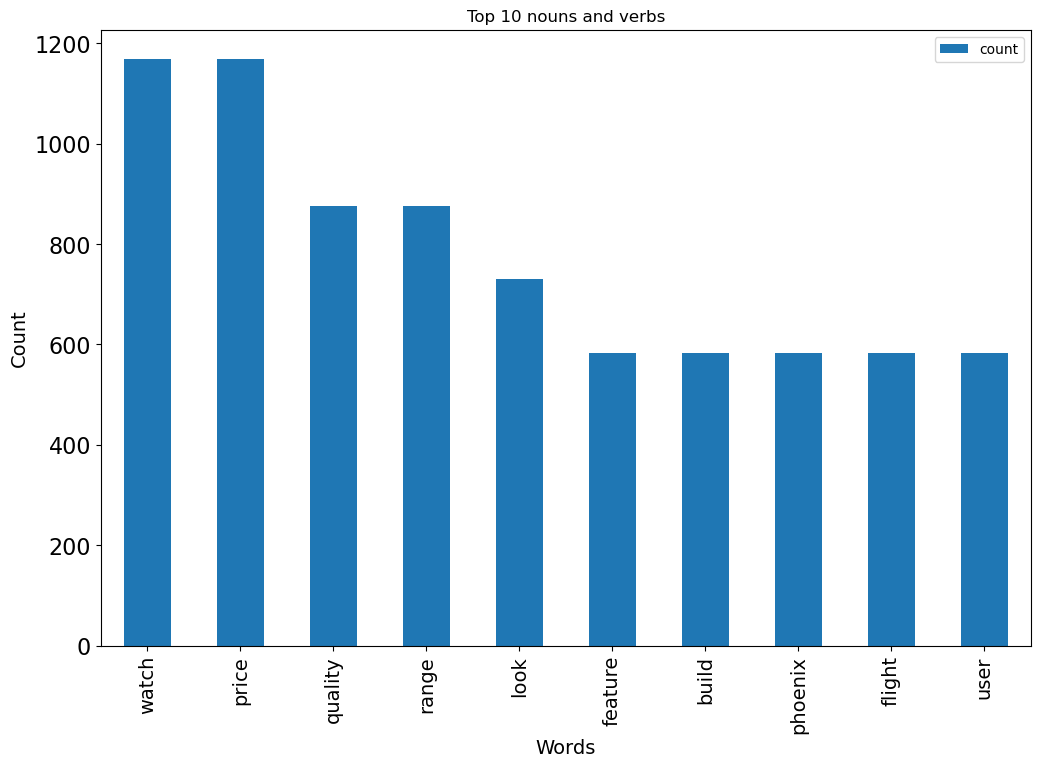

In [61]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [62]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [63]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [64]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [65]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1460


In [66]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...,"[watch, delivers, style, value, sleek, design,...",0.571429,0.294643
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...,"[nice, watch, various, feature, reasonable, pr...",0.780000,0.470000
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux...","[astonishing, look, perfectly, amazing, luxuri...",0.725000,0.141667
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...,"[quality, good, many, feature, stainless, stee...",0.608333,0.408333
4,good product price range probably guessing met...,"good product price range..probably guessing, m...","[good, product, price, range, probably, guessi...",0.306410,0.141026


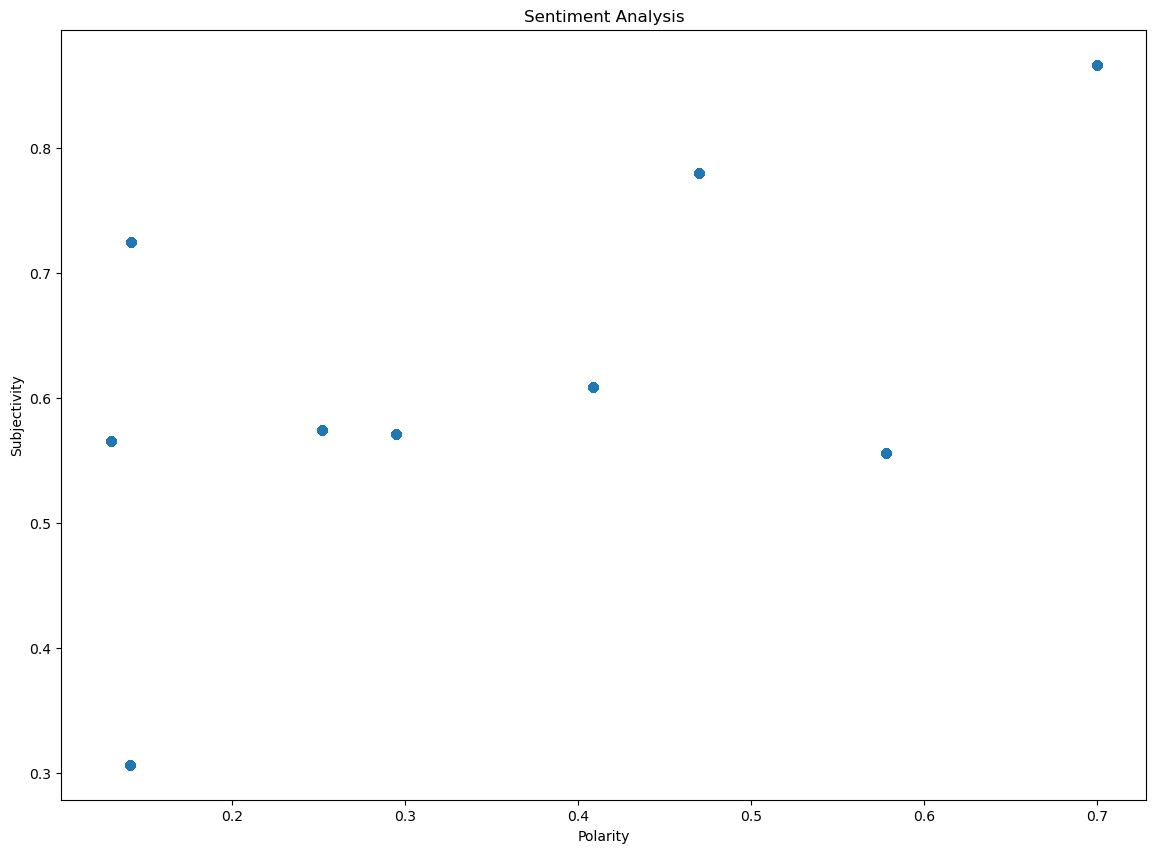

In [67]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [68]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,watch delivers style value sleek design reliab...,this watch delivers style value. its sleek des...,"[watch, delivers, style, value, sleek, design,...",0.571429,0.294643,pos
1,nice watch various feature reasonable price ra...,its nice watch various features reasonable pri...,"[nice, watch, various, feature, reasonable, pr...",0.780000,0.470000,pos
2,astonishing look perfectly amazing luxurious y...,"it's astonishing , looks perfectly amazing lux...","[astonishing, look, perfectly, amazing, luxuri...",0.725000,0.141667,pos
3,quality good many feature stainless steel belt...,the quality good many features..the stainless ...,"[quality, good, many, feature, stainless, stee...",0.608333,0.408333,pos
4,good product price range probably guessing met...,"good product price range..probably guessing, m...","[good, product, price, range, probably, guessi...",0.306410,0.141026,pos


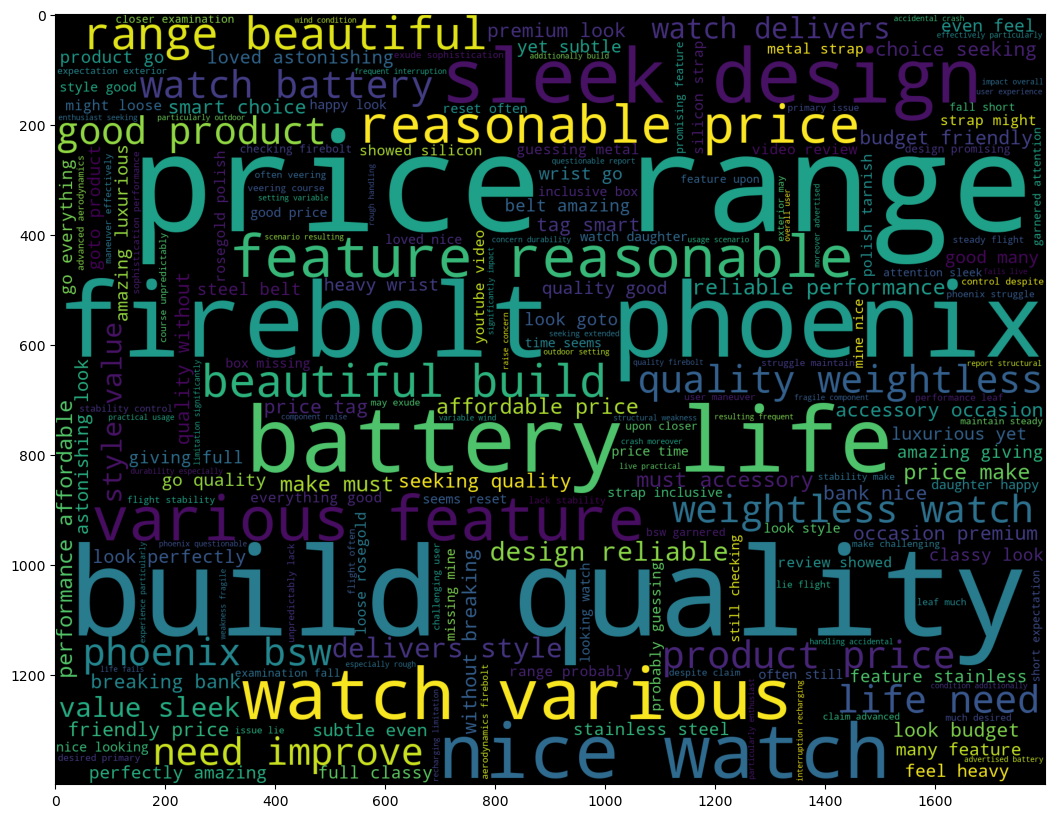

In [69]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [70]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

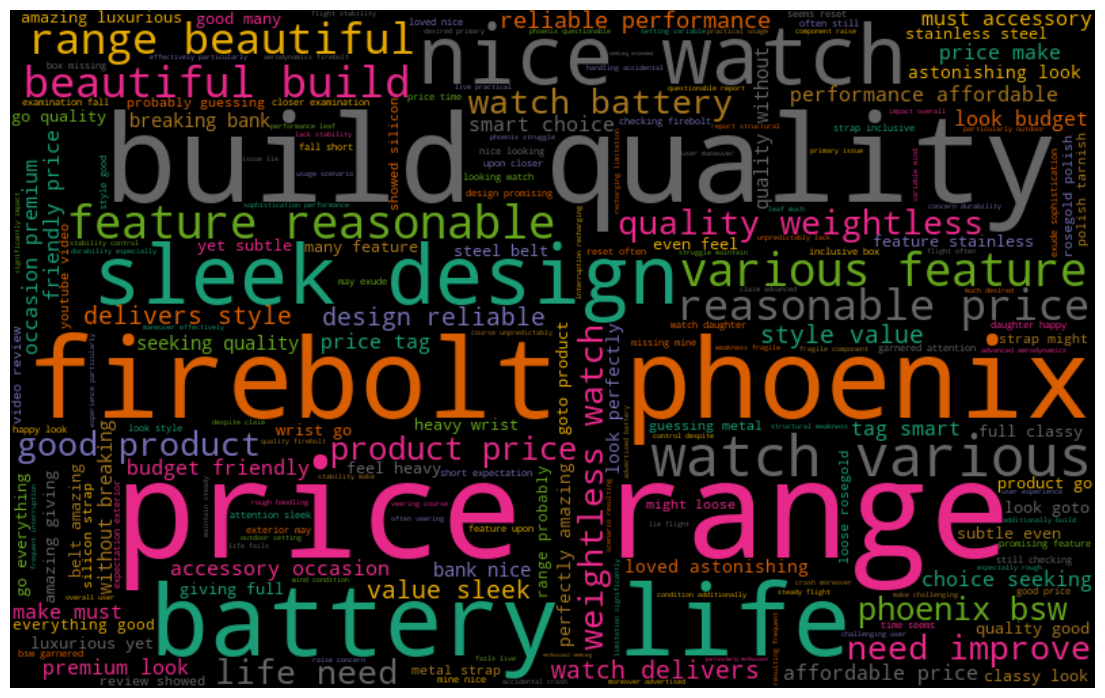

In [71]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

As there are no neg reviews we cannot build a wordcloud for negative images.

### Conclusion

Finally we can see as it has no neg reviews or few negative reviews we can suggest this product for the users.